# Visualización de datos: Distribuciones

### OBJETIVO

- Utilizar `boxplots` para visualizar distribuciones
- Filtrar `valores atípicos` usando el `Score de Rango Intercuartílico`
- Caracterizar nuestras distribuciones usando `tablas de frecuencias`

## Carga general de datos

Para obtener nuestras distribuciones, utilizaremos las siguientes librerias y funciones:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis

In [2]:
# Nos identifica los registros que se encuentran fuera del Score del IQR
def is_outlier(x):

    IQR = x.quantile(0.75) - x.quantile(0.25)
    filtro_sup = x.quantile(0.75) + (IQR * 1.5)
    filtro_inf = x.quantile(0.25) - (IQR * 1.5)
    
    return (x > filtro_sup) | (x < filtro_inf)

In [3]:
# Nos calcula la media truncada al 10% de una columna x
def trim_mean_10(x):
    return stats.trim_mean(x, 0.1)

In [4]:
# Nos calcula el percentil n de una columna x 
def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    return percentile_

Vamos a realizar lo siguiente:

- Cargar los documentos que validaremos, para visualizar su `distribución` y eliminar los `outliders`
- Normalizar la fecha en formato de `ns`

In [5]:
df_global = pd.read_csv('../Datasets/Datos_2016_2020.csv')  #Data general

df_global.head()

date id_station  PM2.5  RH   TMP  WDR  WSP
0  01/01/2016 01:00        AJM     45  61  15.1  185  1.9
1  01/01/2016 01:00        AJU     20  88   5.6  197  1.3
2  01/01/2016 01:00        BJU     78  59  16.6  195  1.3
3  01/01/2016 01:00        HGM     68  52  17.1   51  0.5
4  01/01/2016 01:00        MER     61  58  17.0   97  0.8

In [6]:
df_global.rename(columns={'PM2.5': 'PM2_5'}, inplace=True)

## Distribución de $PM_{2.5}$ y variables antropogénicas

Comenzamos generando `boxplots` por `estación` de está partícula, para poder identificar visualmente como se encuentran `distribuidos` nuestros datos, así como los datos atípicos (`outliders`).  
Con esto, podemos complementar nuestros estimados de locación que previamente obtuvimos.

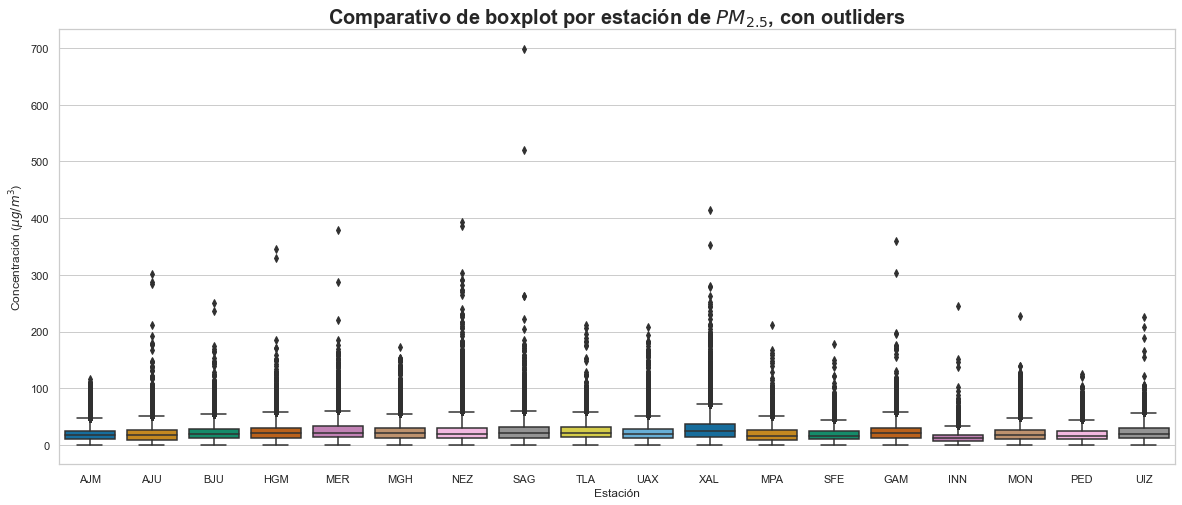

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))
ax = sns.boxplot(x='id_station',y='PM2_5', data=df_global, palette='colorblind');
ax.set(xlabel='Estación', ylabel='Concentración ($\mu g/m^3$)');
ax.set_title('Comparativo de boxplot por estación de $PM_{2.5}$, con outliders', fontsize=20, fontweight='bold');

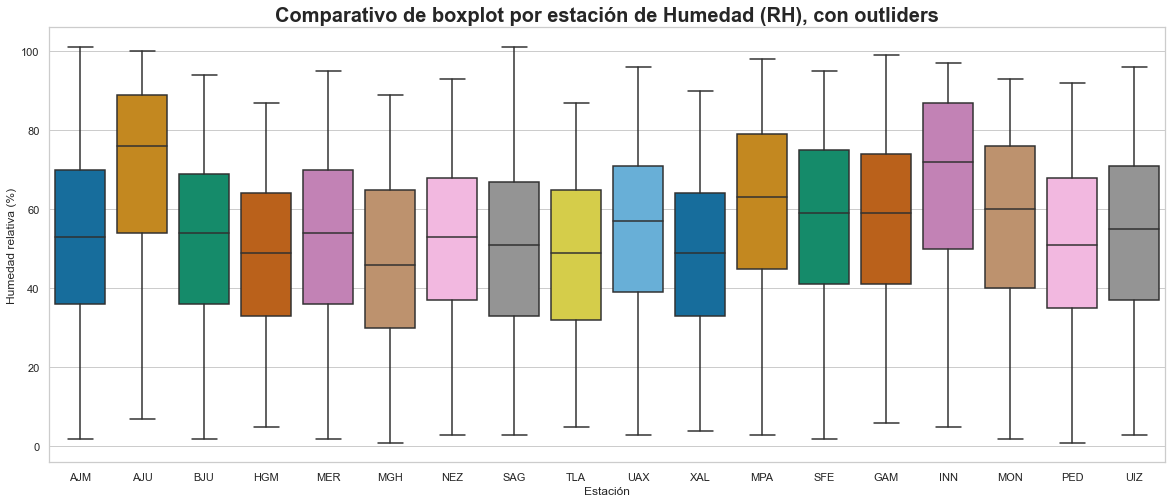

In [8]:
plt.figure(figsize=(20, 8))
ax = sns.boxplot(x='id_station',y='RH', data=df_global, palette='colorblind');
ax.set(xlabel='Estación', ylabel='Humedad relativa (%)');
ax.set_title('Comparativo de boxplot por estación de Humedad (RH), con outliders', fontsize=20, fontweight='bold');

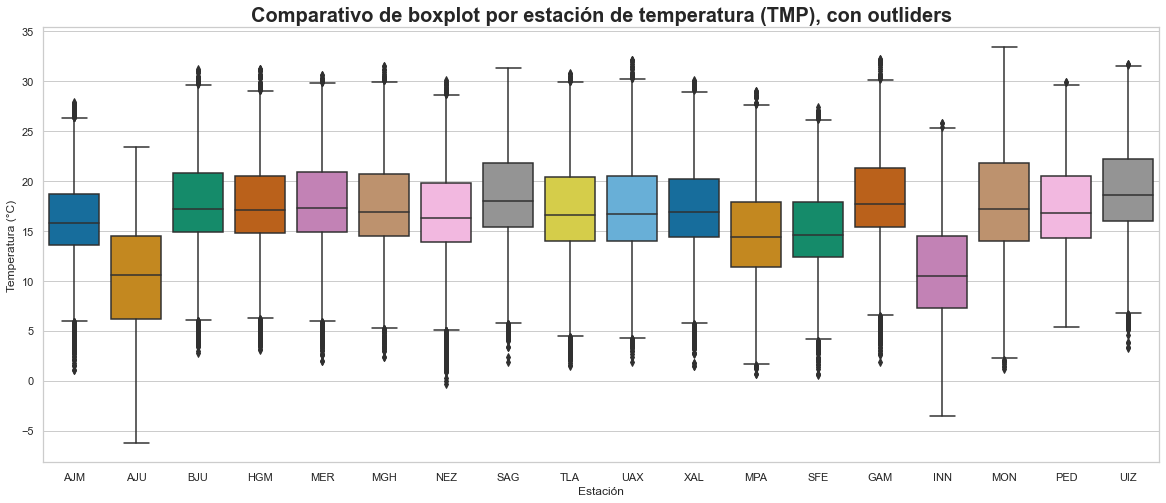

In [9]:
plt.figure(figsize=(20, 8))
ax = sns.boxplot(x='id_station',y='TMP', data=df_global, palette='colorblind');
ax.set(xlabel='Estación', ylabel='Temperatura (°C)');
ax.set_title('Comparativo de boxplot por estación de temperatura (TMP), con outliders', fontsize=20, fontweight='bold');

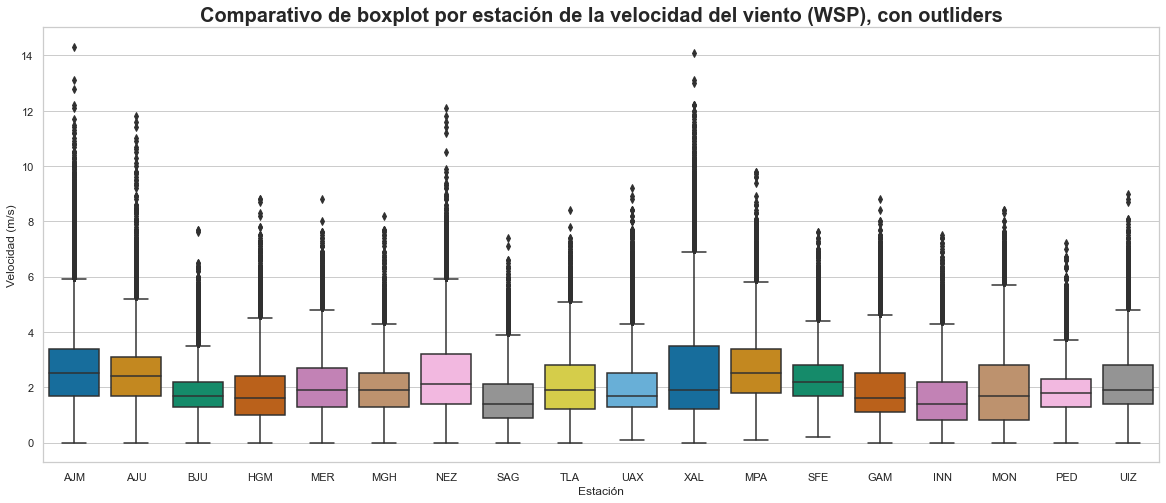

In [10]:
plt.figure(figsize=(20, 8))
ax = sns.boxplot(x='id_station',y='WSP', data=df_global, palette='colorblind');
ax.set(xlabel='Estación', ylabel='Velocidad (m/s)');
ax.set_title('Comparativo de boxplot por estación de la velocidad del viento (WSP), con outliders', fontsize=20, fontweight='bold');

***
Ahora, con nuestra tabla de frecuencias, que se encuentra por intervalos de 50 $\mu g/m^3$, vemos que la `mayoría` de nuestros datos se encuentran entre `1-101` $\mu g/m^3$. Además de que `después de 151` $\mu g/m^3$ las frecuencias disminuyen drásticamente. Podemos inferir que áhí es donde se encuentran nuestros `outliders`.

In [11]:
tablas_freq_PM25 = {}
min = df_global['PM2_5'].min()
max = df_global['PM2_5'].max()
for estacion in df_global['id_station'].unique():
  f = df_global[df_global['id_station'] == estacion]
  s = pd.cut(f['PM2_5'], bins=range(int(min), int(max), 50))
  r = f['PM2_5'].groupby(s).count()
  tablas_freq_PM25[estacion] = r
pd.DataFrame(tablas_freq_PM25)

AJM    AJU    BJU    HGM    MER    MGH    NEZ    SAG    TLA  \
PM2_5                                                                       
(1, 51]     31085  13613  33240  24195  30415  21627  33230  24817  30522   
(51, 101]     647    303   1238   1267   1908    892   1676   1226   1558   
(101, 151]     13     24     26     47     66     41    135     41     18   
(151, 201]      0      5      5      5     12      5     30     14      7   
(201, 251]      0      1      2      0      1      0     12      2      2   
(251, 301]      0      2      0      0      1      0      7      2      0   
(301, 351]      0      1      0      2      0      0      1      0      0   
(351, 401]      0      0      0      0      1      0      2      0      0   
(401, 451]      0      0      0      0      0      0      0      0      0   
(451, 501]      0      0      0      0      0      0      0      0      0   
(501, 551]      0      0      0      0      0      0      0      1      0   
(551, 601]      0      0      0      0      0      0      0      0      0   
(601, 651]      0      0      0      0      0      0      0      0      0   

              UAX    XAL   MPA    SFE    GAM    INN   MON    PED    UIZ  
PM2_5                                                                    
(1, 51]     31535  25829  9591  21596  23679  15285  9557  15021  10180  
(51, 101]     756   3417   245    413   1356     72   287    268    465  
(101, 151]     68    101    13      8     30      3    29      6      5  
(151, 201]     18     45     4      1     11      1     0      0      3  
(201, 251]      1     11     1      0      0      1     1      0      2  
(251, 301]      0      4     0      0      0      0     0      0      0  
(301, 351]      0      0     0      0      1      0     0      0      0  
(351, 401]      0      1     0      0      1      0     0      0      0  
(401, 451]      0      1     0      0      0      0     0      0      0  
(451, 501]      0      0     0      0      0      0     0      0      0  
(501, 551]      0      0     0      0      0      0     0      0      0  
(551, 601]      0      0     0      0      0      0     0      0      0  
(601, 651]      0      0     0      0      0      0     0      0      0

In [12]:
tablas_freq_RH = {}
min = df_global['RH'].min()
max = df_global['RH'].max()
for estacion in df_global['id_station'].unique():
  f = df_global[df_global['id_station'] == estacion]
  s = pd.cut(f['RH'], bins=range(int(min), int(max), 15))
  r = f['RH'].groupby(s).count()
  tablas_freq_RH[estacion] = r
pd.DataFrame(tablas_freq_RH)

AJM   AJU   BJU   HGM   MER   MGH   NEZ   SAG   TLA   UAX   XAL  \
RH                                                                           
(1, 16]    979    93  1124  1165  1118  1563  1047  1513  1614   930  1434   
(16, 31]  4745   858  5145  4761  4956  4480  5071  4416  6076  4320  5254   
(31, 46]  7283  1733  7558  6060  6965  5405  7893  5870  7426  6305  6823   
(46, 61]  6880  2001  7523  6059  7251  4615  8304  5858  7266  7260  7448   
(61, 76]  7269  2591  8995  6087  8196  4707  9424  5847  7861  8914  6926   
(76, 91]  4678  4235  4314  1571  4251  1901  3583  2857  2152  5056  1755   

           MPA   SFE   GAM   INN   MON   PED   UIZ  
RH                                                  
(1, 16]    190   397   403   198   283   482   325  
(16, 31]   950  2548  2884  1147  1197  2423  1497  
(31, 46]  1538  4247  4697  2104  1752  3664  2263  
(46, 61]  2053  4844  5459  2335  2006  3532  2441  
(61, 76]  2310  5090  6515  2886  2314  3623  2594  
(76, 91]  2579  4997  4643  5267  2348  1733  1639

In [13]:
tablas_freq_TMP = {}
min = df_global['TMP'].min()
max = df_global['TMP'].max()
for estacion in df_global['id_station'].unique():
  f = df_global[df_global['id_station'] == estacion]
  s = pd.cut(f['TMP'], bins=range(int(min), int(max), 5))
  r = f['TMP'].groupby(s).count()
  tablas_freq_TMP[estacion] = r
pd.DataFrame(tablas_freq_TMP)

AJM   AJU    BJU    HGM    MER   MGH    NEZ    SAG    TLA    UAX  \
TMP                                                                            
(-6, -1]      0   460      0      0      0     0      0      0      0      0   
(-1, 4]      42  1961     16     20     23    22     99      5     55     20   
(4, 9]      861  3283    594    419    610   417   1103    506   1149   1472   
(9, 14]    8625  4731   5525   4403   5184  4450   8293   3794   7043   6831   
(14, 19]  15229  3450  16223  11863  14949  9941  15405  11045  13429  13604   
(19, 24]   6635   519   9461   7115   9098  5884   8474   7448   8220   8327   
(24, 29]    627     0   2845   1843   2971  1910   1948   3551   2443   2530   

            XAL   MPA   SFE    GAM   INN   MON   PED   UIZ  
TMP                                                         
(-6, -1]      0     0     0      0    62     0     0     0  
(-1, 4]      34    46    54     16  1242    41     0     4  
(4, 9]      724   753  1212    401  4526   605   234   177  
(9, 14]    5748  4002  8493   3202  5457  1913  3196  1058  
(14, 19]  13510  3353  8540  11693  3434  3558  6863  4617  
(19, 24]   7961  1581  3688   7067   848  2439  4018  3316  
(24, 29]   1644   277   239   2706    17  1247  1144  1577

In [14]:
tablas_freq_WSP = {}
min = df_global['WSP'].min()
max = df_global['WSP'].max()
for estacion in df_global['id_station'].unique():
  f = df_global[df_global['id_station'] == estacion]
  s = pd.cut(f['WSP'], bins=range(int(min), int(max), 2))
  r = f['WSP'].groupby(s).count()
  tablas_freq_WSP[estacion] = r
pd.DataFrame(tablas_freq_WSP)

AJM   AJU    BJU    HGM    MER    MGH    NEZ    SAG    TLA    UAX  \
WSP                                                                             
(0, 2]    11783  4969  24285  16822  18283  12901  16399  19581  17509  20742   
(2, 4]    15135  7893   9687   7732  12566   8828  13800   6405  12639  10040   
(4, 6]     3847  1308    725   1033   1933    802   4378    479   2160   1856   
(6, 8]      997   186     15     95     79     29    704     11     67    210   
(8, 10]     206    36      0      5      1      1     36      0      1      8   
(10, 12]     33    10      0      0      0      0      5      0      0      0   

            XAL   MPA    SFE    GAM    INN   MON   PED   UIZ  
WSP                                                           
(0, 2]    15593  3264   9327  16077  10794  5701  9639  5693  
(2, 4]     8053  5294  11438   7081   4329  2774  5312  4173  
(4, 6]     3658  1234   1401   1669    424  1018   501   857  
(6, 8]     1698   202     60    152     35   222    12   104  
(8, 10]     537    18      0      2      0     3     0     5  
(10, 12]     70     0      0      0      0     0     0     0

Ahora, aplicando el `Score del Rango Intercuartilico`, vamos a depurar nuestro dataset de outliders.  

## PM 2.5
Después de dicha depuración, eliminamos `12,096` registros que equivalen al `2.82%` del dataset inicial. 

In [15]:
print(f'Dataset con outliders: {df_global.shape[0]}')
df_global_no_outlier = df_global[~df_global.groupby('id_station').PM2_5.apply(is_outlier)]
print(f'Dataset sin outliders: {df_global_no_outlier.shape[0]}')

Dataset con outliders: 428388
Dataset sin outliders: 416292


## RH  
Después de esta depuración, eliminamos `0` registros del dataset inicial.

In [16]:
print(f'Dataset con outliders: {df_global_no_outlier.shape[0]}')
df_global_no_outlier = df_global_no_outlier[~df_global_no_outlier.groupby('id_station').RH.apply(is_outlier)]
print(f'Dataset sin outliders: {df_global_no_outlier.shape[0]}')

Dataset con outliders: 416292
Dataset sin outliders: 416292


## TMP  
Después de esta depuración, eliminamos `1,395` registros que equivalen al `0.32%` del dataset inicial.

In [17]:
print(f'Dataset con outliders: {df_global_no_outlier.shape[0]}')
df_global_no_outlier = df_global_no_outlier[~df_global_no_outlier.groupby('id_station').TMP.apply(is_outlier)]
print(f'Dataset sin outliders: {df_global_no_outlier.shape[0]}')

Dataset con outliders: 416292
Dataset sin outliders: 414897


## WSP  
Después de esta depuración, eliminamos `13,243` registros que equivalen al `3.09%` del dataset inicial.

In [18]:
print(f'Dataset con outliders: {df_global_no_outlier.shape[0]}')
df_global_no_outlier = df_global_no_outlier[~df_global_no_outlier.groupby('id_station').WSP.apply(is_outlier)]
print(f'Dataset sin outliders: {df_global_no_outlier.shape[0]}')

Dataset con outliders: 414897
Dataset sin outliders: 401654


## Total depurado: `26,734` registros del dataset inicial

Con nuestro dataset sin outliders, volvemos a generar boxplots con las mismas caracterísicas, para observar nuestra distribución depurada.  

A nivel estación, vemos que los boxplots ya no muestran tantos outliders como al principio. Además de que las cajas ya se encuentran más amplias al no estar tan grande el rango de nuestros datos.

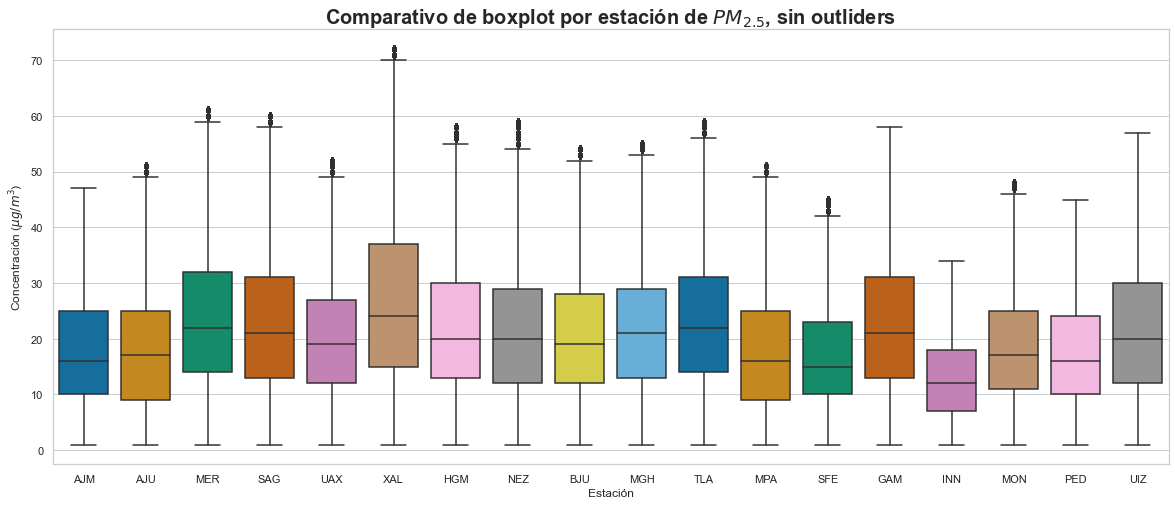

In [19]:
plt.figure(figsize=(20, 8))
ax = sns.boxplot(x='id_station',y='PM2_5', data=df_global_no_outlier, palette='colorblind');
ax.set(xlabel='Estación', ylabel='Concentración ($\mu g/m^3$)');
ax.set_title('Comparativo de boxplot por estación de $PM_{2.5}$, sin outliders', fontsize=20, fontweight='bold');

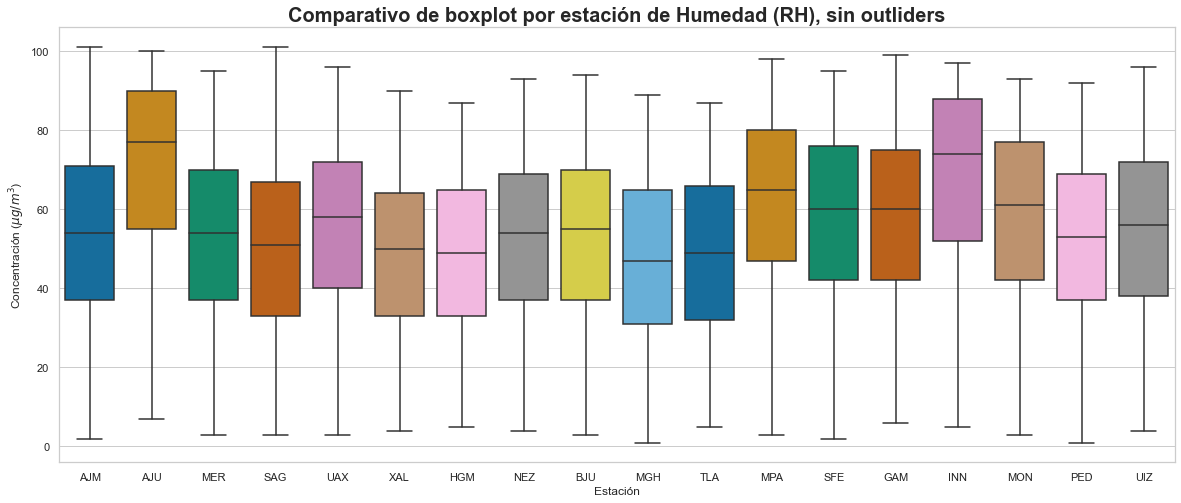

In [20]:
plt.figure(figsize=(20, 8))
ax = sns.boxplot(x='id_station',y='RH', data=df_global_no_outlier, palette='colorblind');
ax.set(xlabel='Estación', ylabel='Concentración ($\mu g/m^3$)');
ax.set_title('Comparativo de boxplot por estación de Humedad (RH), sin outliders', fontsize=20, fontweight='bold');

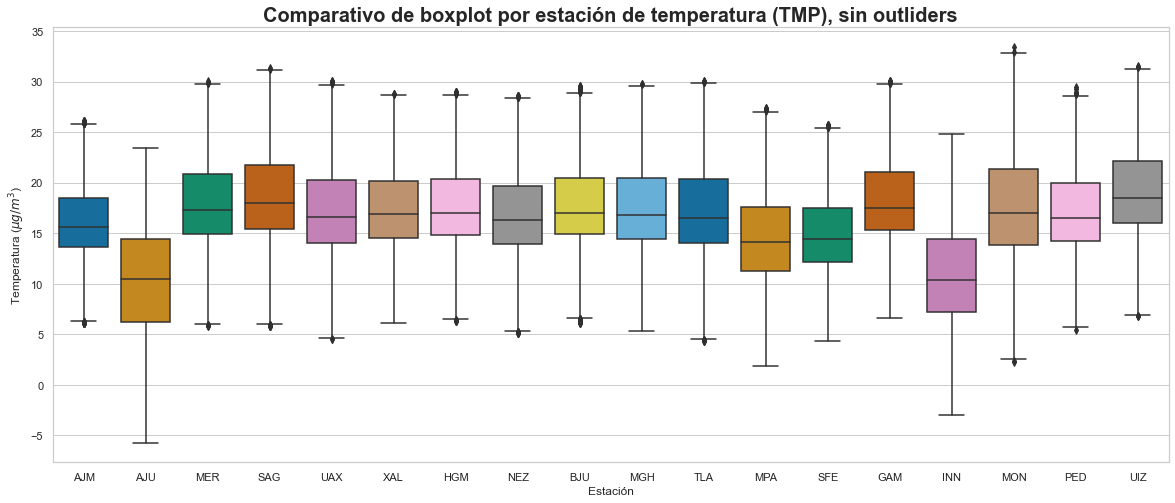

In [21]:
plt.figure(figsize=(20, 8))
ax = sns.boxplot(x='id_station',y='TMP', data=df_global_no_outlier, palette='colorblind');
ax.set(xlabel='Estación', ylabel='Temperatura ($\mu g/m^3$)');
ax.set_title('Comparativo de boxplot por estación de temperatura (TMP), sin outliders', fontsize=20, fontweight='bold');

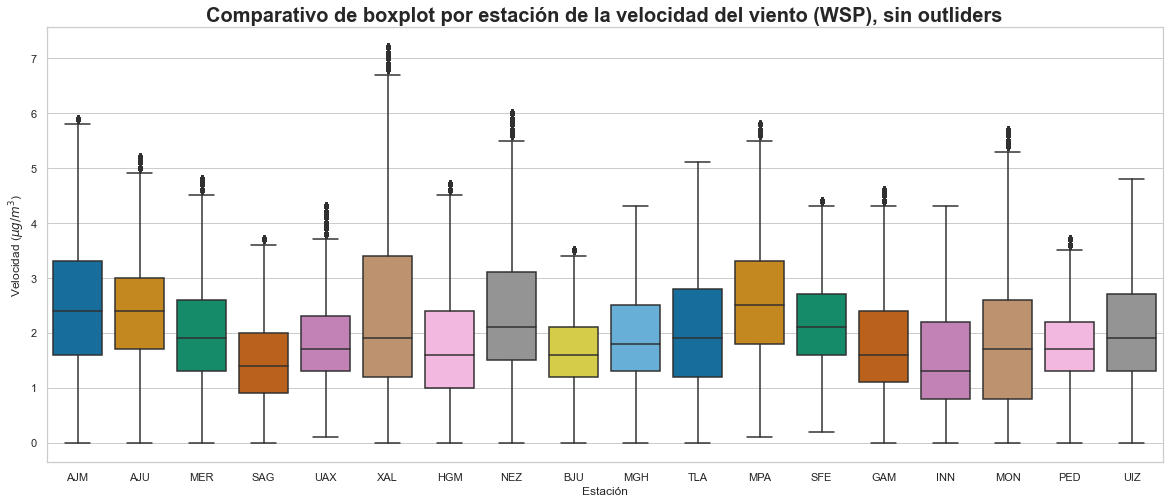

In [22]:
plt.figure(figsize=(20, 8))
ax = sns.boxplot(x='id_station',y='WSP', data=df_global_no_outlier, palette='colorblind');
ax.set(xlabel='Estación', ylabel='Velocidad ($\mu g/m^3$)');
ax.set_title('Comparativo de boxplot por estación de la velocidad del viento (WSP), sin outliders', fontsize=20, fontweight='bold');

También en nuestra tabla de frecuencias se aprecia que los datos no superan los `71` $\mu g/m^3$, y redujimos el intervalo a 10 $\mu g/m^3$ para apreciar que realmente nuestros datos se encuentran concentrados entre `11-31` $\mu g/m^3$

In [23]:
tablas_freq_PM25_no = {}
min = df_global_no_outlier['PM2_5'].min()
max = df_global_no_outlier['PM2_5'].max()
for estacion in df_global_no_outlier['id_station'].unique():
  f = df_global_no_outlier[df_global_no_outlier['id_station'] == estacion]
  s = pd.cut(f['PM2_5'], bins=range(int(min), int(max), 10))
  r = f['PM2_5'].groupby(s).count()
  tablas_freq_PM25_no[estacion] = r
pd.DataFrame(tablas_freq_PM25_no)

AJM   AJU   MER   SAG    UAX   XAL   HGM    NEZ    BJU   MGH  \
PM2_5                                                                      
(1, 11]    8826  3982  5586  4611   6985  4220  4962   7511   7350  4104   
(11, 21]  10604  4395  8998  7618  10541  7232  7969  10406  10846  7263   
(21, 31]   6481  3018  7855  6292   7981  6383  5829   8127   7886  5554   
(31, 41]   2748  1311  4852  3731   3349  4239  3312   4285   3937  2936   
(41, 51]    668   460  2463  1793   1208  2571  1587   2012   1712  1248   
(51, 61]      0     0  1131   707     64  1663   548    762    256   240   
(61, 71]      0     0     0     0      0   922     0      0      0     0   

           TLA   MPA   SFE   GAM   INN   MON   PED   UIZ  
PM2_5                                                     
(1, 11]   5208  3122  6759  4678  7022  2572  4371  2181  
(11, 21]  9994  3038  7617  7453  5444  3417  5369  3104  
(21, 31]  8139  1854  3885  5596  1867  1982  3020  2461  
(31, 41]  4528   901  1729  3181   234   905  1130  1391  
(41, 51]  2201   388   345  1638     0   283   220   618  
(51, 61]   836     0     0   608     0     0     0   194  
(61, 71]     0     0     0     0     0     0     0     0

In [24]:
tablas_freq_RH_no = {}
min = df_global_no_outlier['RH'].min()
max = df_global_no_outlier['RH'].max()
for estacion in df_global_no_outlier['id_station'].unique():
  f = df_global_no_outlier[df_global_no_outlier['id_station'] == estacion]
  s = pd.cut(f['RH'], bins=range(int(min), int(max), 15))
  r = f['RH'].groupby(s).count()
  tablas_freq_RH_no[estacion] = r
pd.DataFrame(tablas_freq_RH_no)

AJM   AJU   MER   SAG   UAX   XAL   HGM   NEZ   BJU   MGH   TLA  \
RH                                                                           
(1, 16]    786    92  1032  1454   807  1313  1089   916   955  1418  1540   
(16, 31]  4132   762  4627  4149  3732  4902  4426  4646  4518  4159  5831   
(31, 46]  6584  1576  6515  5406  5612  6117  5611  7328  6719  5020  6991   
(46, 61]  6328  1810  6867  5523  6770  6770  5725  7798  6949  4354  6946   
(61, 76]  6978  2427  7977  5655  8577  6664  5962  9140  8704  4599  7744   
(76, 91]  4595  4071  4159  2794  4985  1723  1558  3496  4251  1882  2128   

           MPA   SFE   GAM   INN   MON   PED   UIZ  
RH                                                  
(1, 16]    142   307   329   174   216   347   300  
(16, 31]   808  2193  2551   996  1009  2051  1341  
(31, 46]  1399  3749  4186  1890  1557  3292  2026  
(46, 61]  1924  4426  4901  2166  1863  3297  2243  
(61, 76]  2244  4833  6196  2728  2204  3533  2501  
(76, 91]  2544  4907  4518  5189  2331  1717  1605

In [25]:
tablas_freq_TMP_no = {}
min = df_global_no_outlier['TMP'].min()
max = df_global_no_outlier['TMP'].max()
for estacion in df_global_no_outlier['id_station'].unique():
  f = df_global_no_outlier[df_global_no_outlier['id_station'] == estacion]
  s = pd.cut(f['TMP'], bins=range(int(min), int(max), 5))
  r = f['TMP'].groupby(s).count()
  tablas_freq_TMP_no[estacion] = r
pd.DataFrame(tablas_freq_TMP_no)

AJM   AJU    MER    SAG    UAX    XAL    HGM    NEZ    BJU   MGH  \
TMP                                                                            
(-5, 0]       0   717      0      0      0      0      0      0      0     0   
(0, 5]        0  2041      0      0     24      0      0      0      0     0   
(5, 10]    1271  3536    917    767   2069   1014    653   1591    952   726   
(10, 15]  11568  4426   7448   4798   8516   7338   6056  10828   7757  5919   
(15, 20]  12242  2633  13638  10864  11959  12094  10831  13219  14579  8859   
(20, 25]   4327   217   7566   6281   6700   6185   5806   6696   7410  4803   
(25, 30]    163     0   1747   2359   1283    858   1025    996   1455  1129   

            TLA   MPA   SFE    GAM   INN   MON   PED   UIZ  
TMP                                                         
(-5, 0]       0     0     0      0   136     0     0     0  
(0, 5]       45    81    38      0  1818    82     0     0  
(5, 10]    1825  1226  2012    525  4970   753   472   227  
(10, 15]   9326  4043  9569   4589  4714  2279  4539  1456  
(15, 20]  11526  2962  6674  10944  2695  3212  5728  4629  
(20, 25]   6997  1020  2191   5643   449  2079  2982  2696  
(25, 30]   1459   118    31   1535     0   754   524  1061

In [26]:
tablas_freq_WSP_no = {}
min = df_global_no_outlier['WSP'].min()
max = df_global_no_outlier['WSP'].max()
for estacion in df_global_no_outlier['id_station'].unique():
  f = df_global_no_outlier[df_global_no_outlier['id_station'] == estacion]
  s = pd.cut(f['WSP'], bins=range(int(min), int(max), 1))
  r = f['WSP'].groupby(s).count()
  tablas_freq_WSP_no[estacion] = r
pd.DataFrame(tablas_freq_WSP_no)

AJM   AJU    MER    SAG    UAX   XAL   HGM    NEZ    BJU   MGH  \
WSP                                                                       
(0, 1]  2086   686   3837   7287   4472  5750  6626   3309   5396  3442   
(1, 2]  9246  4180  13669  11729  15555  8892  9417  12197  17884  8913   
(2, 3]  9179  5505   8727   4990   6964  5039  5256   8827   7634  6355   
(3, 4]  5407  2185   3703   1081   2987  2936  2391   4683   1234  2286   
(4, 5]  2337   894   1366      0    575  2051   667   2613      0   324   
(5, 6]  1306   127      0      0      0  1603     0   1692      0     0   

          TLA   MPA   SFE   GAM   INN   MON   PED   UIZ  
WSP                                                      
(0, 1]   5733   384   831  5338  5343  2582  1857  1080  
(1, 2]  11135  2798  8224  9956  5112  2828  7534  4375  
(2, 3]   8332  3222  8089  4657  3180  1790  3922  2814  
(3, 4]   4157  1898  2813  2341  1002   916   931  1289  
(4, 5]   1701   821   558   763   141   547     0   529  
(5, 6]    105   327     0     0     0   338     0     0

Comparando nuestros `estimados de locación y variabilidad` en el dataset inicial y el depurado, apreciamos lo siguiente:  
- Como ya pudimos ver en nuestros boxplots y la tabla de frecuencias, nuestros `rangos` disminuyeron drásticamente, aunque siguen siendo mayores al IQR, ya que este se reajusta a los nuevos datos y continua considerando "nuevos" outliders.  
- Las `medias` también disminuyeron, reduciendo más la ya de por sí corta diferencia con la mediana. Lo que nos sigue confirmando un bajo sesgo en nuestra distribución.  
- A pesar de que disminuyó nuestra `desviación estándar`, la mayoría nuestros datos continuan dentro del `percentil 25 y 75`.

Guardamos nuestro nuevo dataset depurado sin outliders

In [27]:
df_global_no_outlier.to_csv('../Datasets/Datos_2016_2020_no_outlier.csv')